In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
import warnings

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

warnings.filterwarnings('ignore')

In [55]:
data_path = 'anjuke_community_process2.csv'
df = pd.read_csv(data_path, encoding='gbk')
df.head()

,community_id,community_name,url,district,township,address,longitude,latitude,age,developer,...,level_comm_num,school_score,nursery_num,junior_num,middle_num,commerce_score,restaurant_num,bank_num,supermarket_num,average_price
0,1,莲园小区,https://shanghai.anjuke.com/community/view/1/,浦东,北蔡,莲园路518弄,31.192010,121.564892,1996.0,其它,...,237.0,7.0,5.0,3.0,2.0,5.0,306.0,54.0,128.0,57483
1,10398,由由四村,https://shanghai.anjuke.com/community/view/10398/,浦东,北蔡,严中路373弄,31.205109,121.544804,1997.0,上海由由房地产开发有限公司,...,398.0,7.0,6.0,4.0,4.0,7.0,163.0,50.0,56.0,60335
2,114691,紫叶路65弄,https://shanghai.anjuke.com/community/view/114...,浦东,北蔡,沪南路1105号,31.187783,121.558899,1996.0,上海建工集团,...,238.0,7.0,6.0,2.0,2.0,10.0,271.0,49.0,109.0,57056
3,114760,北中小区,https://shanghai.anjuke.com/community/view/114...,浦东,北蔡,莲中路255弄,31.189522,121.562974,1998.0,上海北蔡房地产发展有限公司,...,235.0,0.0,0.0,0.0,0.0,10.0,251.0,49.0,115.0,46086
4,115387,莲安西路117号,https://shanghai.anjuke.com/community/view/115...,浦东,北蔡,沪南路1105号,31.187783,121.558899,1996.0,上海建工集团,...,238.0,7.0,6.0,2.0,2.0,10.0,271.0,49.0,109.0,41399


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000094A2CB6978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000094A4E37A20>]], dtype=object)

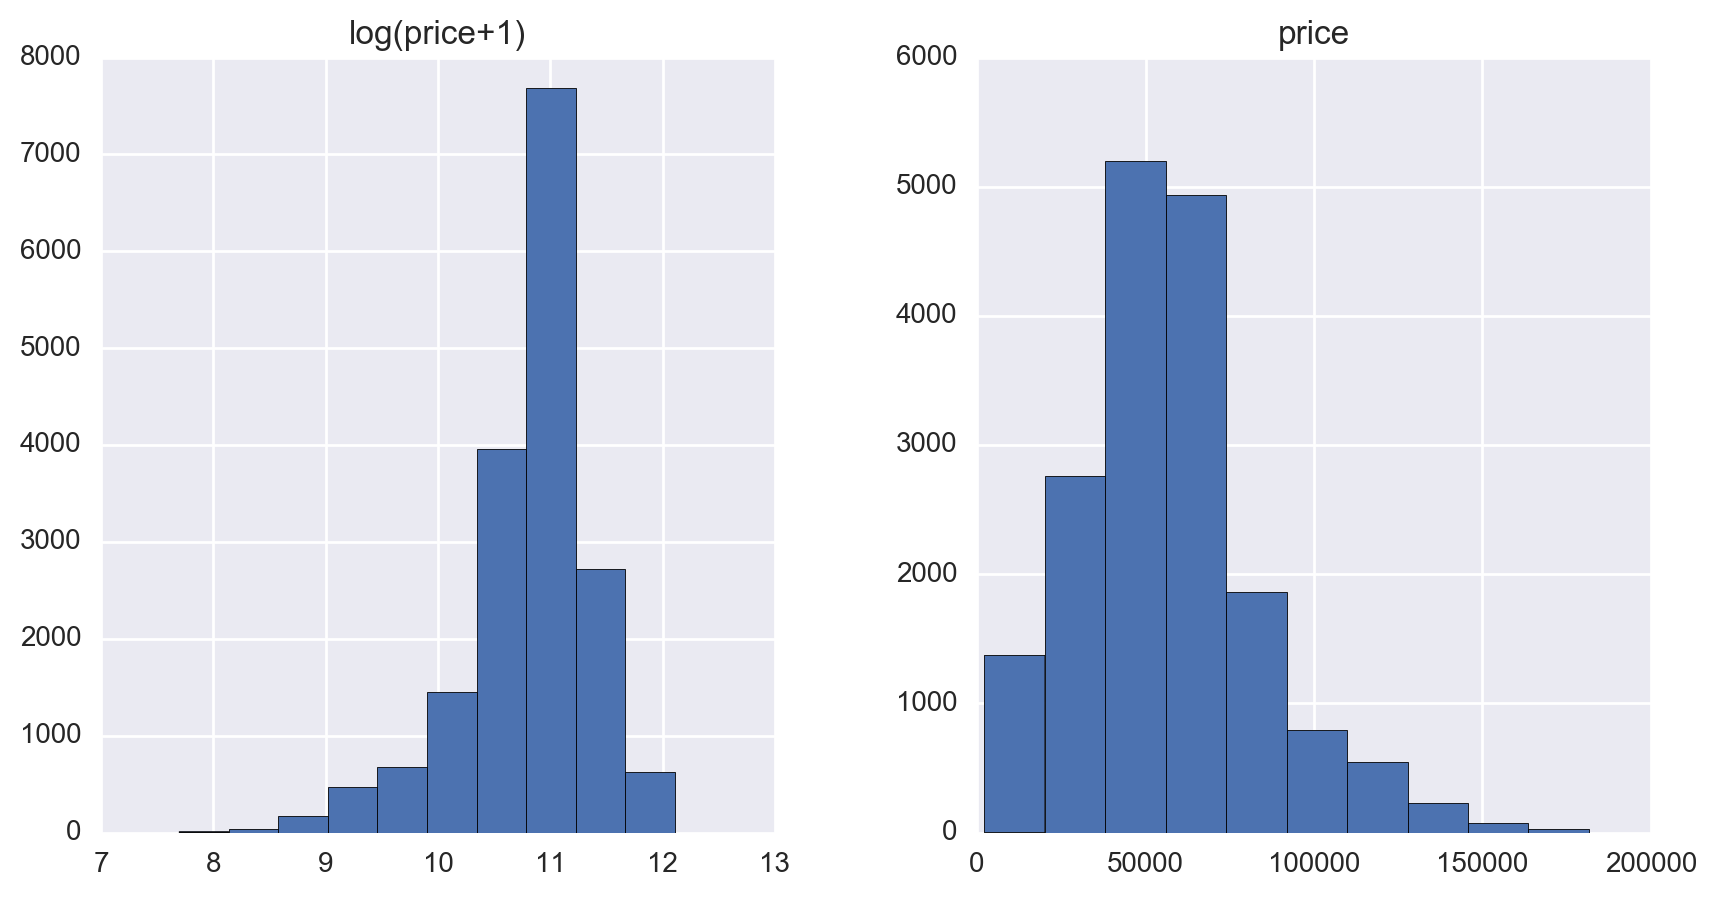

In [56]:
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
prices = pd.DataFrame({'price': df['average_price'], 'log(price+1)': np.log1p(df['average_price'])})
prices.hist()

In [57]:
#log transform the target:
df["average_price"] = np.log1p(df["average_price"])

In [58]:
all_data = df[['district', 'township', 'age',
       'property_type', 'property_fee',
       'total_construction_area', 'volume_rate', 'total_houses',
       'parking_space', 'green_rate', 'greet', 'comfort', 'traffic_score',
       'metro_station_num', 'bus_station_num', 'hospital_score',
       'level_three_num', 'level_two_num', 'level_one_num', 'level_comm_num',
       'school_score', 'nursery_num', 'junior_num', 'middle_num',
       'commerce_score', 'restaurant_num', 'bank_num', 'supermarket_num']]
all_data.head()

,district,township,age,property_type,property_fee,total_construction_area,volume_rate,total_houses,parking_space,green_rate,...,level_one_num,level_comm_num,school_score,nursery_num,junior_num,middle_num,commerce_score,restaurant_num,bank_num,supermarket_num
0,浦东,北蔡,1996.0,公寓,0.45,3000.0,1.40,326.0,180.0,30.0,...,1.0,237.0,7.0,5.0,3.0,2.0,5.0,306.0,54.0,128.0
1,浦东,北蔡,1997.0,公寓,0.60,48000.0,2.00,800.0,360.0,20.0,...,5.0,398.0,7.0,6.0,4.0,4.0,7.0,163.0,50.0,56.0
2,浦东,北蔡,1996.0,公寓,1.20,9000.0,1.79,300.0,120.0,31.0,...,1.0,238.0,7.0,6.0,2.0,2.0,10.0,271.0,49.0,109.0
3,浦东,北蔡,1998.0,公寓,0.80,35000.0,1.70,300.0,39.0,32.0,...,1.0,235.0,0.0,0.0,0.0,0.0,10.0,251.0,49.0,115.0
4,浦东,北蔡,1996.0,公寓,1.20,33500.0,1.79,560.0,180.0,31.0,...,1.0,238.0,7.0,6.0,2.0,2.0,10.0,271.0,49.0,109.0


In [59]:
#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness

skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [60]:
all_data.head()

,district,township,age,property_type,property_fee,total_construction_area,volume_rate,total_houses,parking_space,green_rate,...,level_one_num,level_comm_num,school_score,nursery_num,junior_num,middle_num,commerce_score,restaurant_num,bank_num,supermarket_num
0,浦东,北蔡,1996.0,公寓,0.371564,8.006701,0.875469,5.789960,5.198497,30.0,...,0.693147,237.0,7.0,1.791759,1.386294,1.098612,5.0,306.0,4.007333,128.0
1,浦东,北蔡,1997.0,公寓,0.470004,10.778977,1.098612,6.685861,5.888878,20.0,...,1.791759,398.0,7.0,1.945910,1.609438,1.609438,7.0,163.0,3.931826,56.0
2,浦东,北蔡,1996.0,公寓,0.788457,9.105091,1.026042,5.707110,4.795791,31.0,...,0.693147,238.0,7.0,1.945910,1.098612,1.098612,10.0,271.0,3.912023,109.0
3,浦东,北蔡,1998.0,公寓,0.587787,10.463132,0.993252,5.707110,3.688879,32.0,...,0.693147,235.0,0.0,0.000000,0.000000,0.000000,10.0,251.0,3.912023,115.0
4,浦东,北蔡,1996.0,公寓,0.788457,10.419331,1.026042,6.329721,5.198497,31.0,...,0.693147,238.0,7.0,1.945910,1.098612,1.098612,10.0,271.0,3.912023,109.0


In [61]:
all_data = pd.get_dummies(all_data)
all_data.head()

,age,property_fee,total_construction_area,volume_rate,total_houses,parking_space,green_rate,greet,comfort,traffic_score,...,township_黄兴公园,township_黄浦滨江,township_龙华,township_龙柏金汇,property_type_公寓,property_type_其它,property_type_别墅,property_type_新里洋房,property_type_普通住宅,property_type_老公房
0,1996.0,0.371564,8.006701,0.875469,5.789960,5.198497,30.0,8.0,7.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1997.0,0.470004,10.778977,1.098612,6.685861,5.888878,20.0,10.0,6.0,9.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1996.0,0.788457,9.105091,1.026042,5.707110,4.795791,31.0,6.0,8.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1998.0,0.587787,10.463132,0.993252,5.707110,3.688879,32.0,8.0,8.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1996.0,0.788457,10.419331,1.026042,6.329721,5.198497,31.0,6.0,8.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [62]:
X_train = all_data
y = df["average_price"]
X_train.head()

,age,property_fee,total_construction_area,volume_rate,total_houses,parking_space,green_rate,greet,comfort,traffic_score,...,township_黄兴公园,township_黄浦滨江,township_龙华,township_龙柏金汇,property_type_公寓,property_type_其它,property_type_别墅,property_type_新里洋房,property_type_普通住宅,property_type_老公房
0,1996.0,0.371564,8.006701,0.875469,5.789960,5.198497,30.0,8.0,7.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1997.0,0.470004,10.778977,1.098612,6.685861,5.888878,20.0,10.0,6.0,9.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1996.0,0.788457,9.105091,1.026042,5.707110,4.795791,31.0,6.0,8.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1998.0,0.587787,10.463132,0.993252,5.707110,3.688879,32.0,8.0,8.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1996.0,0.788457,10.419331,1.026042,6.329721,5.198497,31.0,6.0,8.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [67]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.cross_validation import cross_val_score
def r2_cv(model):
    rmse=cross_val_score(model, X_train, y, cv = 5)
    return(rmse)

In [68]:
model_ridge = Ridge()

In [69]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [r2_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

0.05     0.180676
0.10     0.182001
0.30     0.186899
1.00     0.200331
3.00     0.223144
5.00     0.236507
10.00    0.255311
15.00    0.265227
30.00    0.276645
50.00    0.278268
75.00    0.274796
dtype: float64


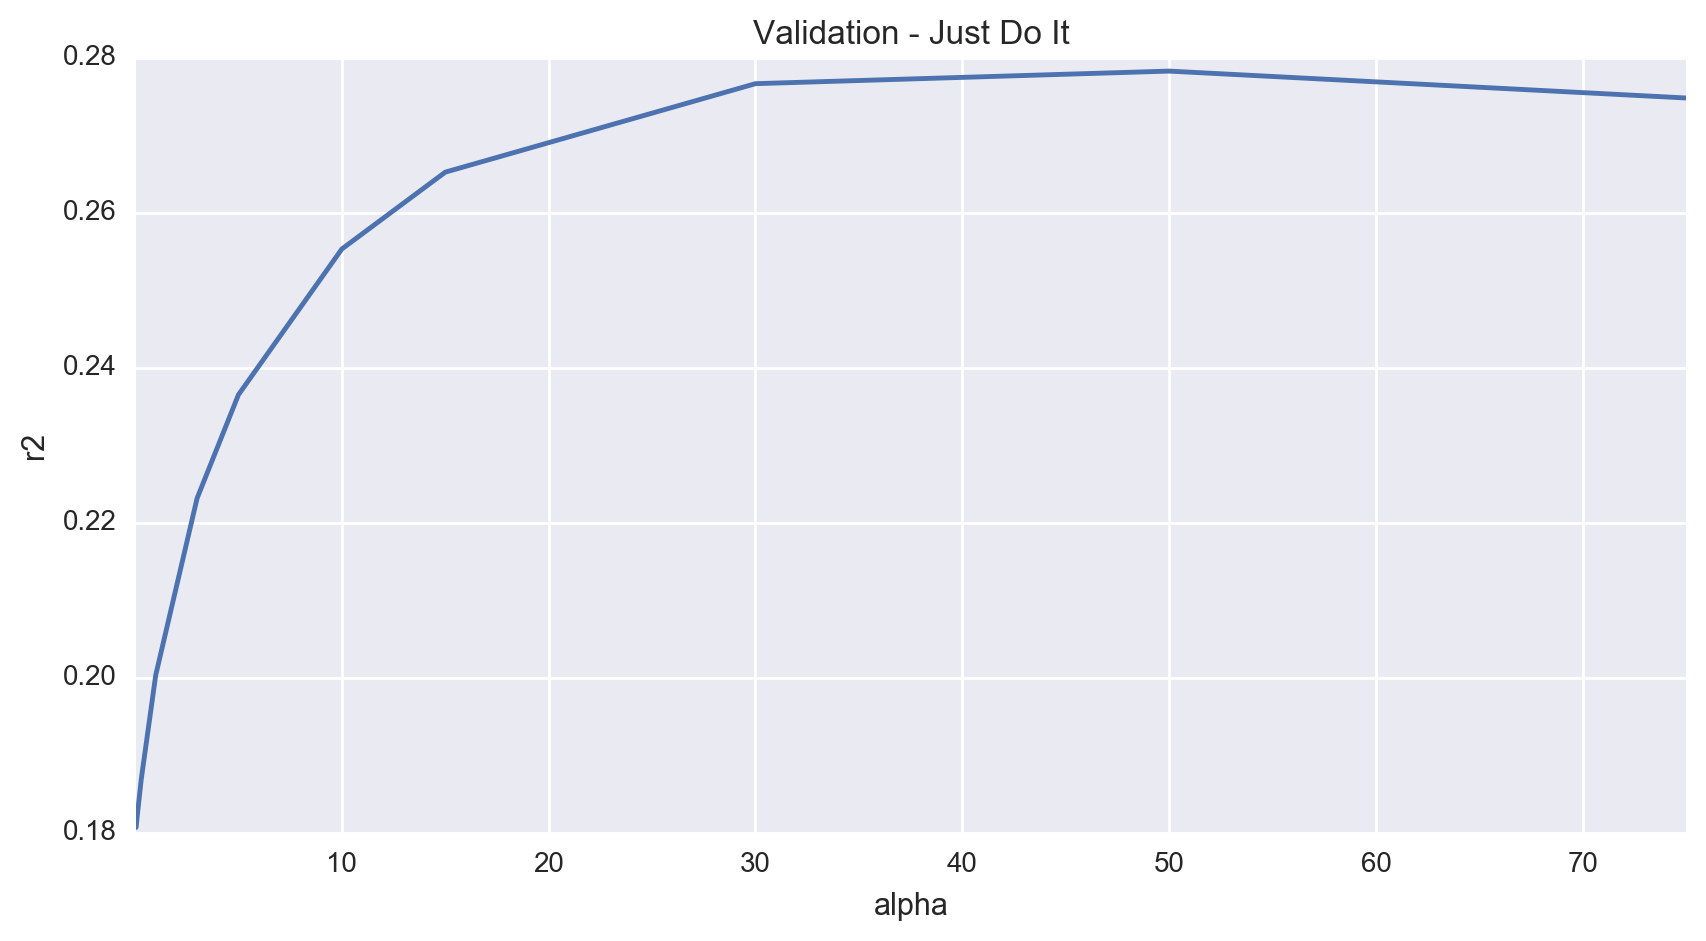

In [71]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
print(cv_ridge)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("r2")